In [1]:
import pandas as pd
train = pd.read_csv("dataset/train_tokens.csv")
train_token = train.no_punc
##This part is altered when the tokens change

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
X_train_counts = CountVectorizer(lowercase = False).fit_transform(train_token)
##lowercase = False keeps the original form of the tokens, do not change

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
##Give weight values to the tokens

In [4]:
X = X_train_tfidf.toarray()
y = train.rating
##Converts it to a readable form for train_test_split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.80, random_state=123456)
##Random state keeps the same split everytime

In [6]:
train_acc =[]
test_acc =[]
train_loss =[]
test_loss =[]
values = [i for i in range(1, 21)]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_accuracy = accuracy_score(y_train, train_pr)
    train_acc.append(train_accuracy)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pr)
    test_acc.append(test_accuracy)
    #calculate loss   
    train_l = log_loss(y_train, train_pr)
    test_l = log_loss(y_test, test_pr)
    train_loss.append(train_l)
    test_loss.append(test_l)
    


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [8]:
print("No Punc: Accuracy\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_acc[i-1], test_acc[i-1]))

No Punc: Accuracy

Iteration: 1, train: 0.503, test: 0.493
Iteration: 2, train: 0.677, test: 0.666
Iteration: 3, train: 0.787, test: 0.794
Iteration: 4, train: 0.789, test: 0.795
Iteration: 5, train: 0.795, test: 0.799
Iteration: 6, train: 0.819, test: 0.823
Iteration: 7, train: 0.870, test: 0.862
Iteration: 8, train: 0.890, test: 0.875
Iteration: 9, train: 0.899, test: 0.879
Iteration: 10, train: 0.909, test: 0.882
Iteration: 11, train: 0.922, test: 0.889
Iteration: 12, train: 0.927, test: 0.891
Iteration: 13, train: 0.925, test: 0.891
Iteration: 14, train: 0.924, test: 0.891
Iteration: 15, train: 0.924, test: 0.891
Iteration: 16, train: 0.928, test: 0.890
Iteration: 17, train: 0.932, test: 0.890
Iteration: 18, train: 0.935, test: 0.891
Iteration: 19, train: 0.936, test: 0.891
Iteration: 20, train: 0.937, test: 0.891


In [9]:
print("No Punc: Loss\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_loss[i-1], test_loss[i-1]))

No Punc: Loss

Iteration: 1, train: 17.164, test: 17.494
Iteration: 2, train: 11.150, test: 11.527
Iteration: 3, train: 7.372, test: 7.098
Iteration: 4, train: 7.286, test: 7.089
Iteration: 5, train: 7.089, test: 6.942
Iteration: 6, train: 6.239, test: 6.105
Iteration: 7, train: 4.475, test: 4.784
Iteration: 8, train: 3.799, test: 4.300
Iteration: 9, train: 3.478, test: 4.162
Iteration: 10, train: 3.126, test: 4.067
Iteration: 11, train: 2.677, test: 3.817
Iteration: 12, train: 2.536, test: 3.773
Iteration: 13, train: 2.584, test: 3.748
Iteration: 14, train: 2.629, test: 3.765
Iteration: 15, train: 2.614, test: 3.773
Iteration: 16, train: 2.489, test: 3.799
Iteration: 17, train: 2.340, test: 3.791
Iteration: 18, train: 2.249, test: 3.748
Iteration: 19, train: 2.213, test: 3.756
Iteration: 20, train: 2.169, test: 3.748


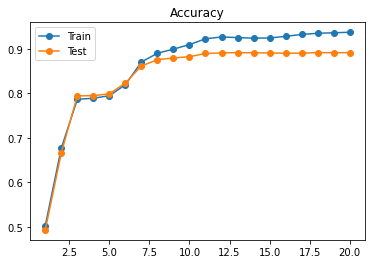

In [10]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Accuracy")
pyplot.plot(values, train_acc, '-o', label='Train')
pyplot.plot(values, test_acc, '-o', label='Test')
pyplot.legend()
pyplot.savefig("no_punc_accuracy.png",dpi=1200)
pyplot.show()

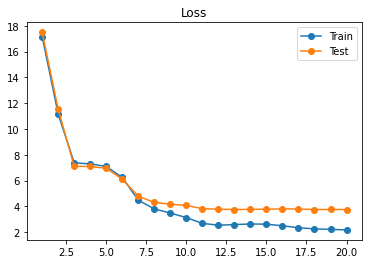

In [11]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Loss")
pyplot.plot(values, train_loss, '-o', label='Train')
pyplot.plot(values, test_loss, '-o', label='Test')
pyplot.legend()
pyplot.savefig("no_punc_loss.png",dpi=1200)
pyplot.show()

In [12]:
###ignore below here##

In [13]:
#from sklearn.metrics import accuracy_score, classification_report

In [14]:
#y_predict = lr.predict(X_test)
##we will change this line when running to the test file after adjusting the max_iter

In [15]:
##print('Logistic Regression Train accuracy %s' % lr.score(X_train, y_train)) #Train accuracy
#print('Logistic Regression Test accuracy %s' % accuracy_score(y_predict, y_test)) #Test=Validation accuracy